<a href="https://colab.research.google.com/github/kumar1607/Credit_Card_Fraud_Detection/blob/main/Credit_Card_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Loading Dataset

In [ ]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
122876,76720,1.491432,-1.300211,0.791864,-1.503432,-1.428550,0.646684,-1.629218,0.191358,-1.352736,...,-0.256461,-0.151511,-0.101947,-0.824320,0.404560,-0.143198,0.079818,0.012577,13.50,0.0
122877,76721,-0.156787,0.167566,1.872078,-0.750101,-0.269882,0.228433,0.277035,-0.060165,0.623997,...,-0.085758,-0.047960,-0.143981,-0.553524,-0.228278,0.991914,-0.191920,-0.208215,47.90,0.0
122878,76722,-4.407079,3.412674,0.262904,-2.292505,-0.076449,-0.721205,1.315481,-0.981098,3.410059,...,-0.515600,0.059942,-0.062766,0.082455,-0.150671,0.391760,-2.495895,-1.926718,1.46,0.0
122879,76723,-0.413685,0.900950,1.121659,-0.162497,0.319067,-0.052581,0.400233,0.322782,-0.401633,...,-0.223570,-0.649185,-0.022059,-0.401229,-0.271775,0.109694,0.248045,0.078265,0.89,0.0
122880,76723,-1.708808,0.777698,1.059110,-0.455618,0.345712,-0.893250,1.396244,-0.381813,-0.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Preproccesing and preparing datasets

In [ ]:
#checking for any missing values


df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.isnull().values.any()

False

<ipython-input-17-3a5b8791aa63>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


<Axes: ylabel='Density'>

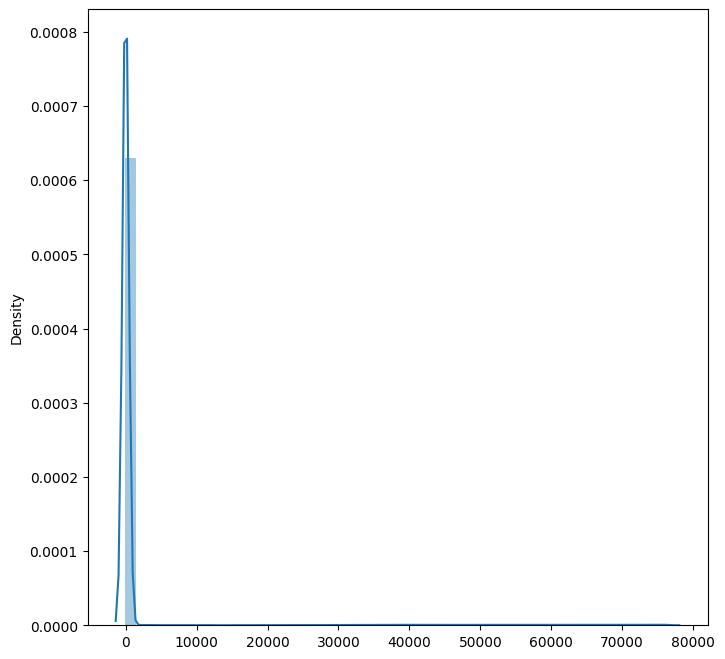

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
sns.distplot(df)

In [ ]:
#we have missing values
#we need to handle them now

#methods to handle
#    1.imputation
#    2.just dropping

In [ ]:
df.shape

(122881, 31)

In [ ]:
#filling missing values in V10 with median


df['V10'].fillna(df['V10'].median(),inplace=True)



#if we find any null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#checking distribution of legit transcation and fradulent transaction

df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#this shows the data is highly unbalanced

#    0  means normal
#    1  means  fraud

In [ ]:
#knowing some statistis of data

df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
#dropping time attribute

df.drop('Time',axis=1,inplace=True)

In [ ]:
#  X is dependnt feature
X=df.drop('Class',axis=1)
#    y is independent feature
y=df['Class']


X.shape,y.shape

((284807, 29), (284807,))

**Normalising Amount attribute using StandardScaler**



In [ ]:
temp_df=df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

standard=StandardScaler()
amount=temp_df['Amount'].values
temp_df['Amount']=standard.fit_transform(amount.reshape(-1,1))


X_scaled=temp_df.drop('Class',axis=1)
y_scaled=temp_df['Class']

X_scaled.shape, y_scaled.shape

((284807, 29), (284807,))

**Exploratory Data Analysis and Visualisation**

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
class_count_df = pd.DataFrame(df['Class'].value_counts().rename_axis('Class').reset_index(name='Counts'))
class_count_df['Class'].replace({0:'Normal',
                                 1:'Fraud'}, inplace=True)
class_count_df.head()

,Class,Counts
0,Normal,284315
1,Fraud,492


from matplotlib import pyplot as plt
_df_0['Counts'].plot(kind='hist', bins=20, title='Counts')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Counts'].plot(kind='line', figsize=(8, 4), title='Counts')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Counts', y='Class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-65-bf8448d5e791>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=list(class_count_df['Class']) ,c='blue', rotation=0, fontsize=10, fontweight='bold')
<ipython-input-65-bf8448d5e791>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')


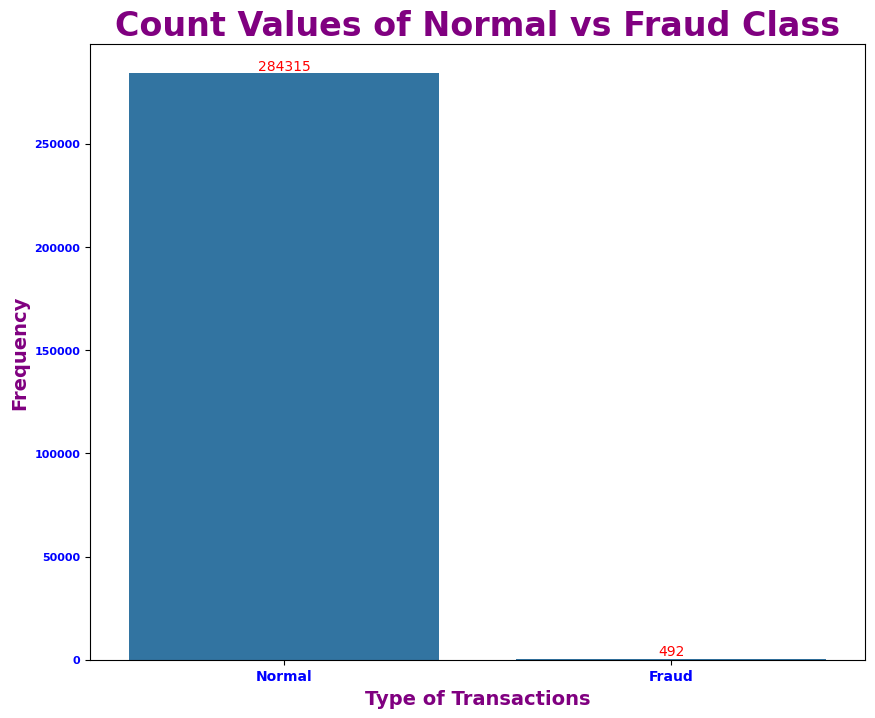

In [ ]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

ax = sns.barplot(x=class_count_df['Class'],
                 y=class_count_df['Counts'])

ax.bar_label(ax.containers[0], color='red') ## Showing Values at top of Each Bar.

ax.set_xticklabels(labels=list(class_count_df['Class']) ,c='blue', rotation=0, fontsize=10, fontweight='bold')
labels, location = plt.yticks()
ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')

plt.xlabel(xlabel='Type of Transactions', fontsize=14, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Frequency', fontsize=14, fontweight='bold').set_color('purple')
plt.title(label='Count Values of Normal vs Fraud Class', fontsize=24, fontweight='bold').set_color('purple')

In [ ]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]
fraud.shape, normal.shape

((492, 30), (284315, 30))

In [ ]:
fraud_frc = len(fraud)/float(len(df))
fraud_frc

0.001727485630620034

In [ ]:
print(f"Percentage of Fraud Tnxs in datasets : {fraud_frc*100:.2f}%")

Percentage of Fraud Tnxs in datasets : 0.17%


In [ ]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

**Handling Imbalanced Datasets**



1) Choose Proper Evaluation Metrics
Accuracy may be good enough for a well-balanced class but not ideal for the imbalanced class problem. The other metrics like precision( measure of how accurate the classifier’s prediction of a specific class ) and recall ( measure of the classifier’s ability to identify a class ) are also considered.

For an imbalanced class dataset, F1 score is a more appropriate metric. F1 score is defined as the harmonic mean between precision and recall. It is used as a statistical measure to rate performance. F1-score ranges between 0 and 1. The closer it is to 1, the better the model.

In [ ]:
#Resampling(undersampling    and     oversampling)

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
from sklearn.utils import resample
df_majority=df[(df['Class']==0)]
df_minority=df[(df['Class']==1)]

#oversampling minority class

df_minority_oversampled=resample(df_minority,
                                 replace=True,
                                 n_samples=284315,
                                 random_state=42)

#concat majority class with oversampled minority class

df_oversampled=pd.concat([df_minority_oversampled,df_majority])

df_oversampled.Class.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [ ]:
X_oversampled = df_oversampled.drop('Class', axis=1)
y_oversampled = df_oversampled['Class']
X_oversampled.shape, y_oversampled.shape

((568630, 29), (568630,))

**Undersampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42)

X_undersampled, y_undersampled = rus.fit_resample(X, y)
print(f"The number of Classes before the fit {Counter(y)}")
print(f"The number of Classes after the fit {Counter(y_undersampled)}")

The number of Classes before the fit Counter({0: 284315, 1: 492})
The number of Classes after the fit Counter({0: 492, 1: 492})


** SMOTE(Synthetic Minority Oversampling Technique)**


Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [ ]:
from imblearn.over_sampling import SMOTE

# Resampling the minority class.

sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.

X_smote, y_smote = sm.fit_resample(df.drop('Class', axis=1), df['Class'])
smote_df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
X_smote.shape

(568630, 29)

In [ ]:
X_smote.shape

(568630, 29)

In [ ]:
%store X_smote

Stored 'X_smote' (DataFrame)


In [ ]:
smote_df.Class.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

***Now trying out all the algorithms on the data set to figure out which fits best***

**1.Logistic Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [ ]:
def LR_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")

    print("Model Fitting.....")
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print("------------Training Prediction--------------")
    y_preds = lr.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds =lr.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")


Spliting Datasets....
Successfully splitted!!!
Model Fitting.....


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.86      0.65      0.74       394

    accuracy                           1.00    227845
   macro avg       0.93      0.82      0.87    227845
weighted avg       1.00      1.00      1.00    227845



Accuracy Score:

99.920560%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.55      0.65        98

    accuracy                           1.00     56962
   macro avg       0.90      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy Score:

99.899933%



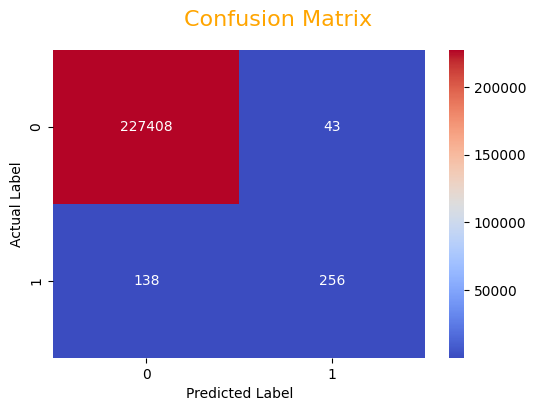

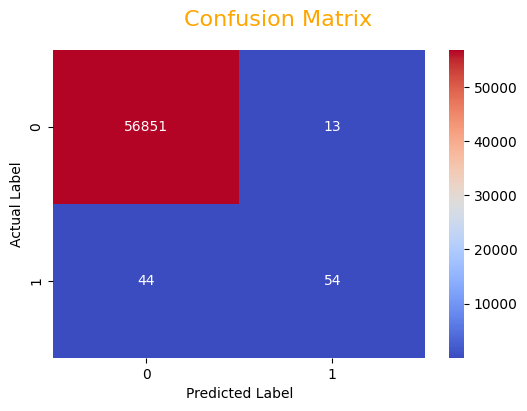

In [ ]:
#Logistic Regression on Normal Datasets.

LR_model(X, y)

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.89      0.63      0.73       394

    accuracy                           1.00    227845
   macro avg       0.94      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



Accuracy Score:

99.921438%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy Score:

99.912222%



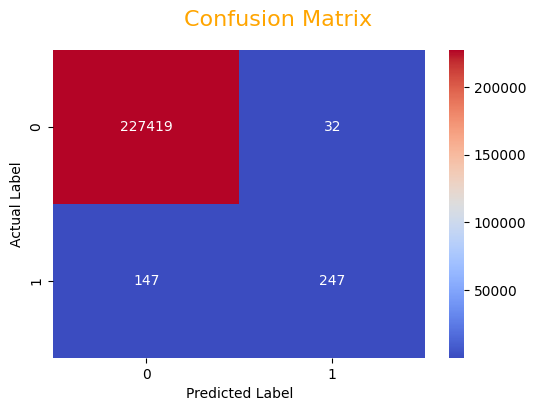

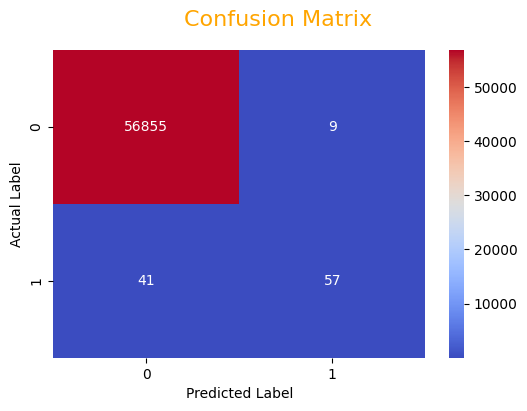

In [ ]:
#Logistic Regression on StandardScaled Dataset

LR_model(X_scaled,y_scaled)

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       393
           1       0.98      0.93      0.96       394

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score:

95.933926%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



Accuracy Score:

92.385787%



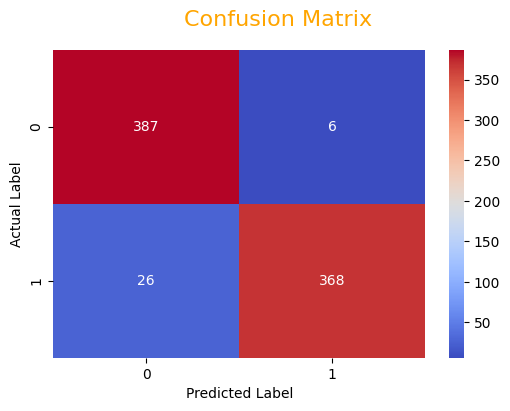

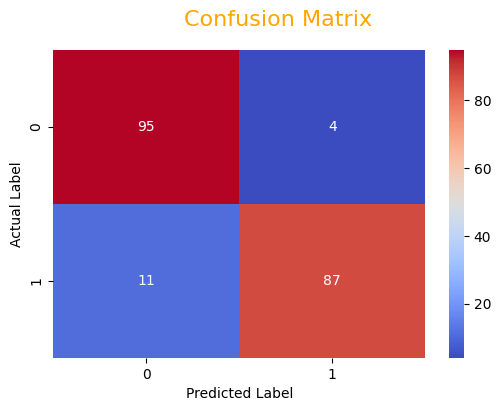

In [ ]:
#Logistic Regression on Undersampled Dataset


LR_model(X_undersampled, y_undersampled)

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95    227335
           1       0.97      0.92      0.94    227569

    accuracy                           0.95    454904
   macro avg       0.95      0.95      0.95    454904
weighted avg       0.95      0.95      0.95    454904



Accuracy Score:

94.640188%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56980
           1       0.97      0.92      0.95     56746

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



Accuracy Score:

94.697782%



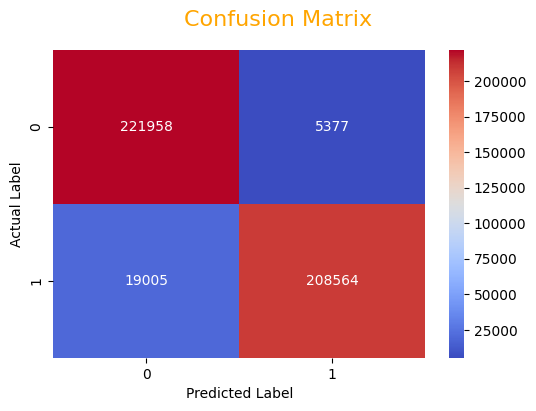

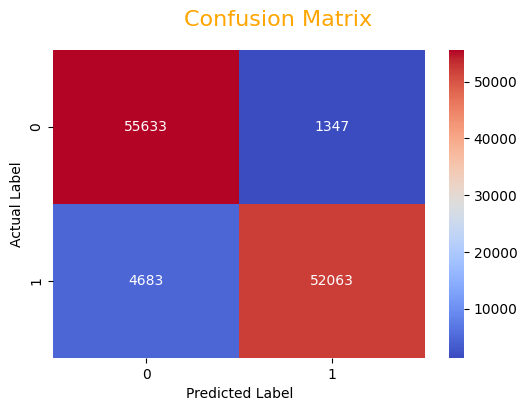

In [ ]:
#Logistic Regression on Oversampled Dataset

LR_model(X_oversampled, y_oversampled)

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    227565
           1       0.98      0.94      0.96    227339

    accuracy                           0.96    454904
   macro avg       0.96      0.96      0.96    454904
weighted avg       0.96      0.96      0.96    454904



Accuracy Score:

95.876273%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56750
           1       0.98      0.94      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



Accuracy Score:

95.871656%



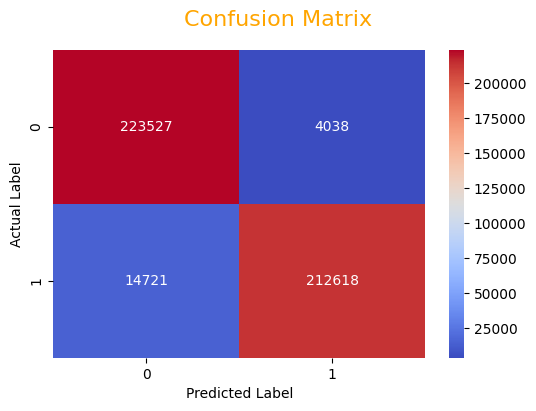

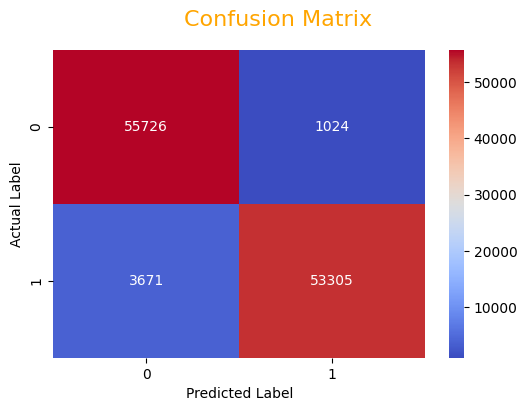

In [ ]:
#Logistic Regression on SMOTE Dataset

LR_model(X_smote, y_smote)

CONCLUSION:

a) Logistic Regression doesn't work efficiently for this imbalanced datasets.

b) It takes around 1-2 minutes for training.

c) Maximum Accuracy of 99.912222%and Macro Average of F1-Score of 0.85 acheived with StandardScaled datasets.

**2.Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def RF_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")

    print("Model Fitting.....")
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print("------------Training Prediction--------------")
    y_preds = rf.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix of Training Datasets",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds = rf.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix of Testing Datasets",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

RandomForestClassifier on Normal Datasets.

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy Score:

99.957867%



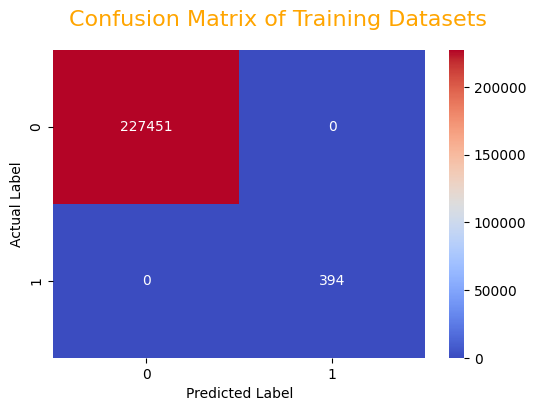

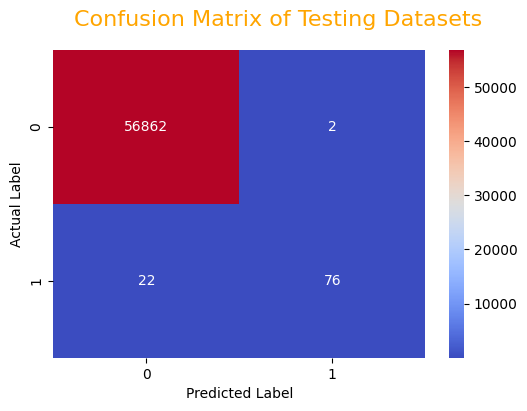

In [ ]:

RF_model(X, y)

RandomForestClassifier on StandardScaled Dataset

In [ ]:
RF_model(X_scaled, y_scaled)

RandomForestClassifier on Undersampled Dataset

In [ ]:
RF_model(X_undersampled, y_undersampled)

RandomForestClassifier on Oversampled Dataset

In [ ]:
RF_model(X_oversampled, y_oversampled)

RandomForestClassifier on SMOTE Dataset

In [ ]:
RF_model(X_smote, y_smote)

CONCLUSION:

a) Undersampling doesn't work efficiently for Large majority class datasets as it ignore many valuable tuples. But, can be efficient for small majority class datasets

b) RandomForest works even efficiently for this imbalanced datasets.

c) RandomForest takes around 10-15 minutes for training.

d) Maximum Accuracy of 99.996483%and macro-average of F1-Score of 1.00 acheived with Oversampling technique.

 Conclusions:

a) Out of all 6 Machine Learning Models used, Random Forest Classifier works efficiently with Maximum Accuracy of 99.996483%and macro-average of F1-Score of 1.00 acheived with Oversampling technique.

b) Oversampling Techniques proved to be efficient for handling Imbalanced Datasets.

c) RandomForest, XGBoost, DecisionTree, K-Neighbors work efficiently even for this Imbalanced Datasets.

d) RandomForest takes lots of Training Time among all of Six models used.